In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_excel('E comm.xlsx')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Data Preprocessing Part 1

In [3]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [4]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

PreferredLoginDevice    3
PreferredPaymentMode    7
Gender                  2
PreferedOrderCat        6
MaritalStatus           3
dtype: int64

In [5]:
# Remove CustomerID column 
df.drop(columns='CustomerID', inplace=True)
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Exploratory Data Analysis

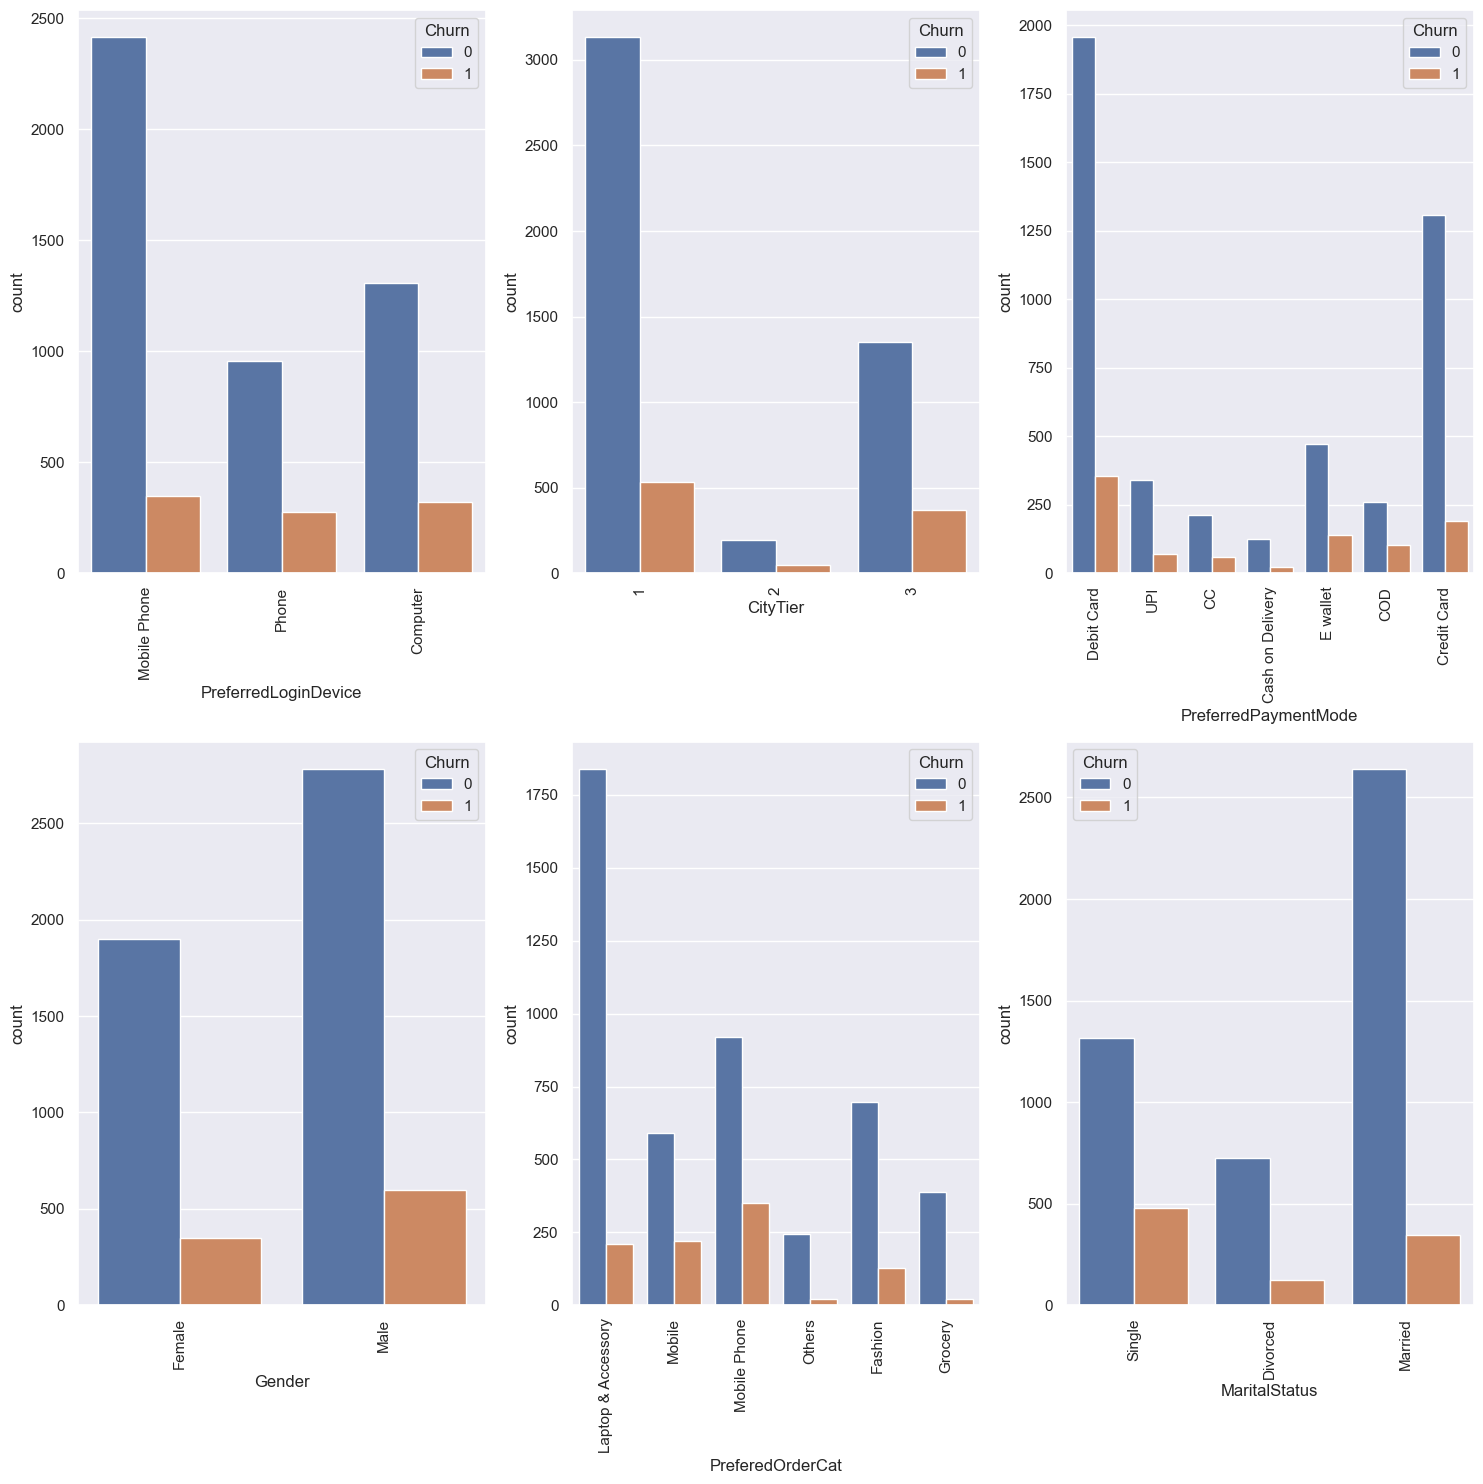

In [6]:
# list of categorical variables to plot
cat_vars = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 
            'PreferedOrderCat','MaritalStatus']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Churn', data=df, ax=axs[i])
    axs[i].tick_params(axis='x', rotation=90)


# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

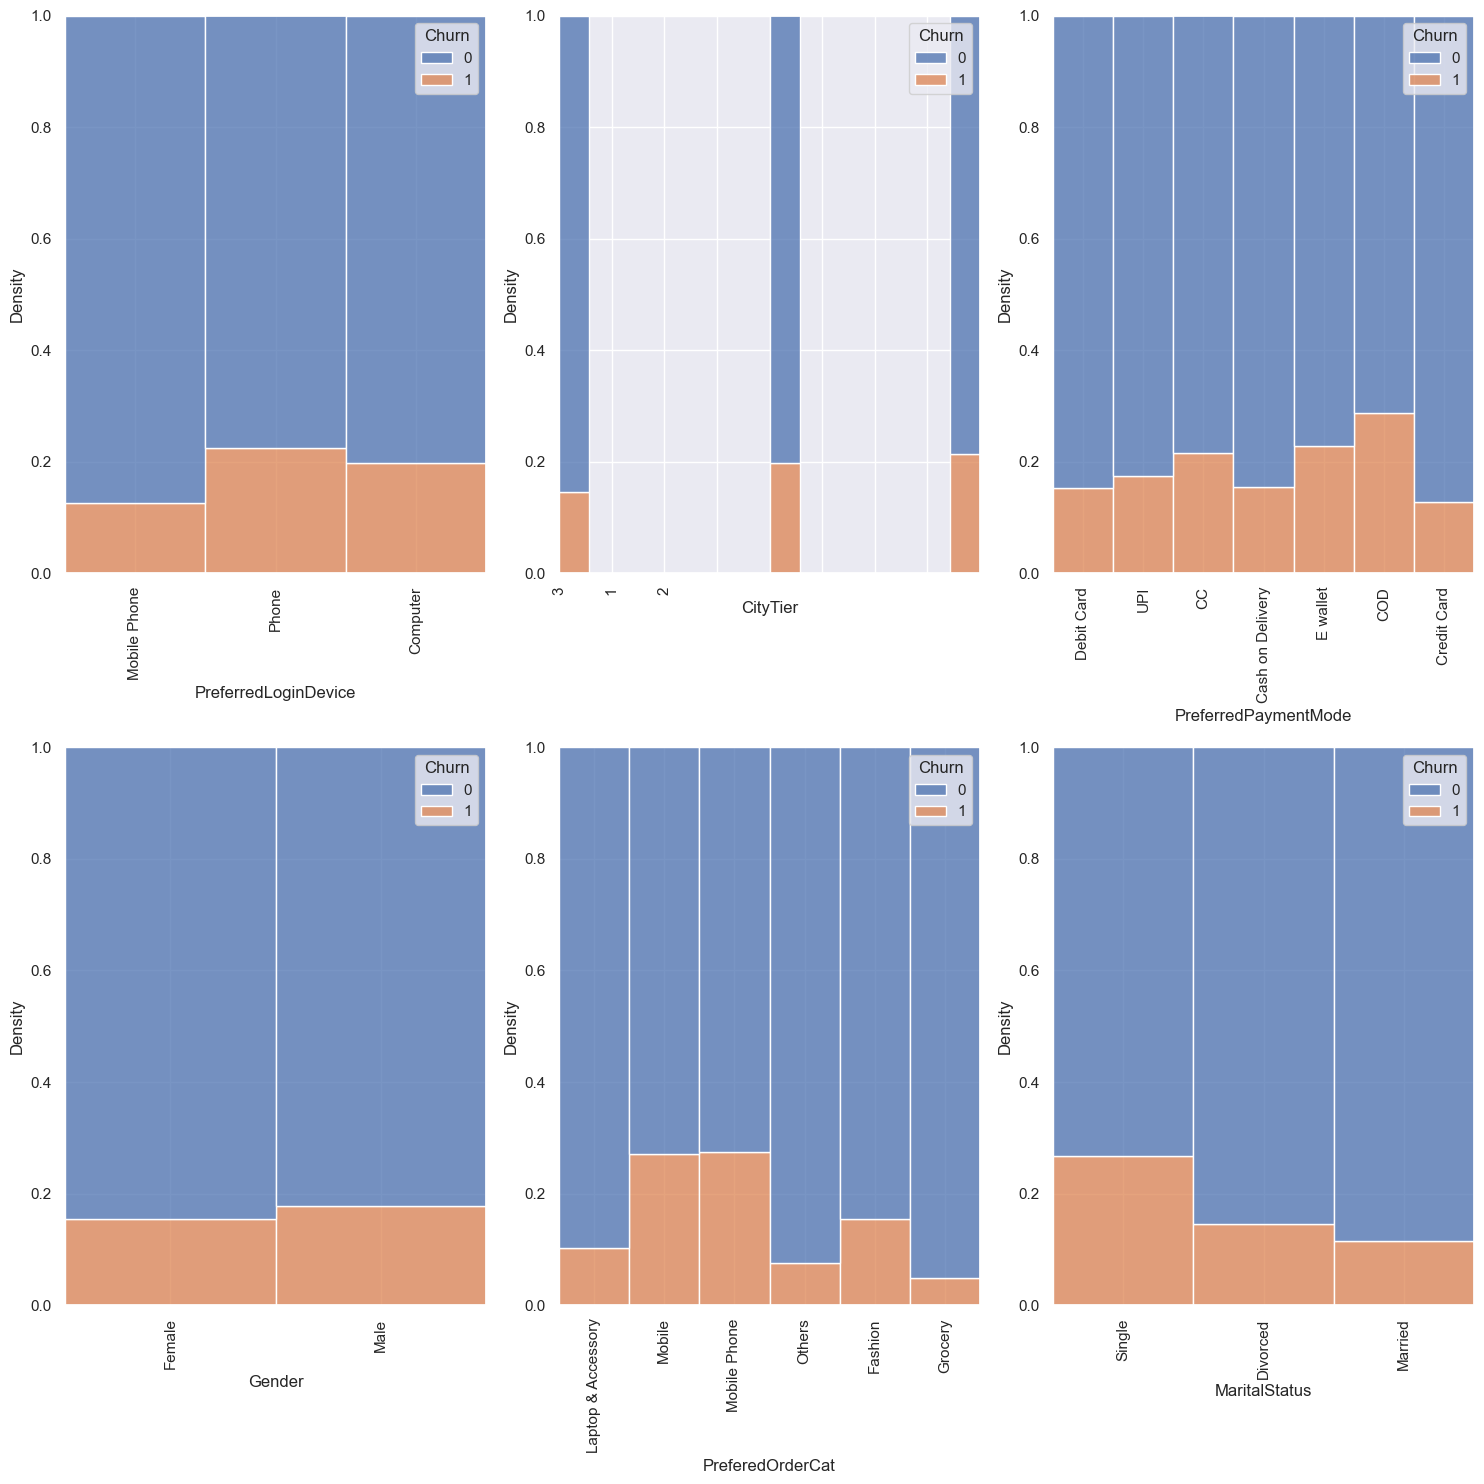

In [7]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 
            'PreferedOrderCat','MaritalStatus']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Churn', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

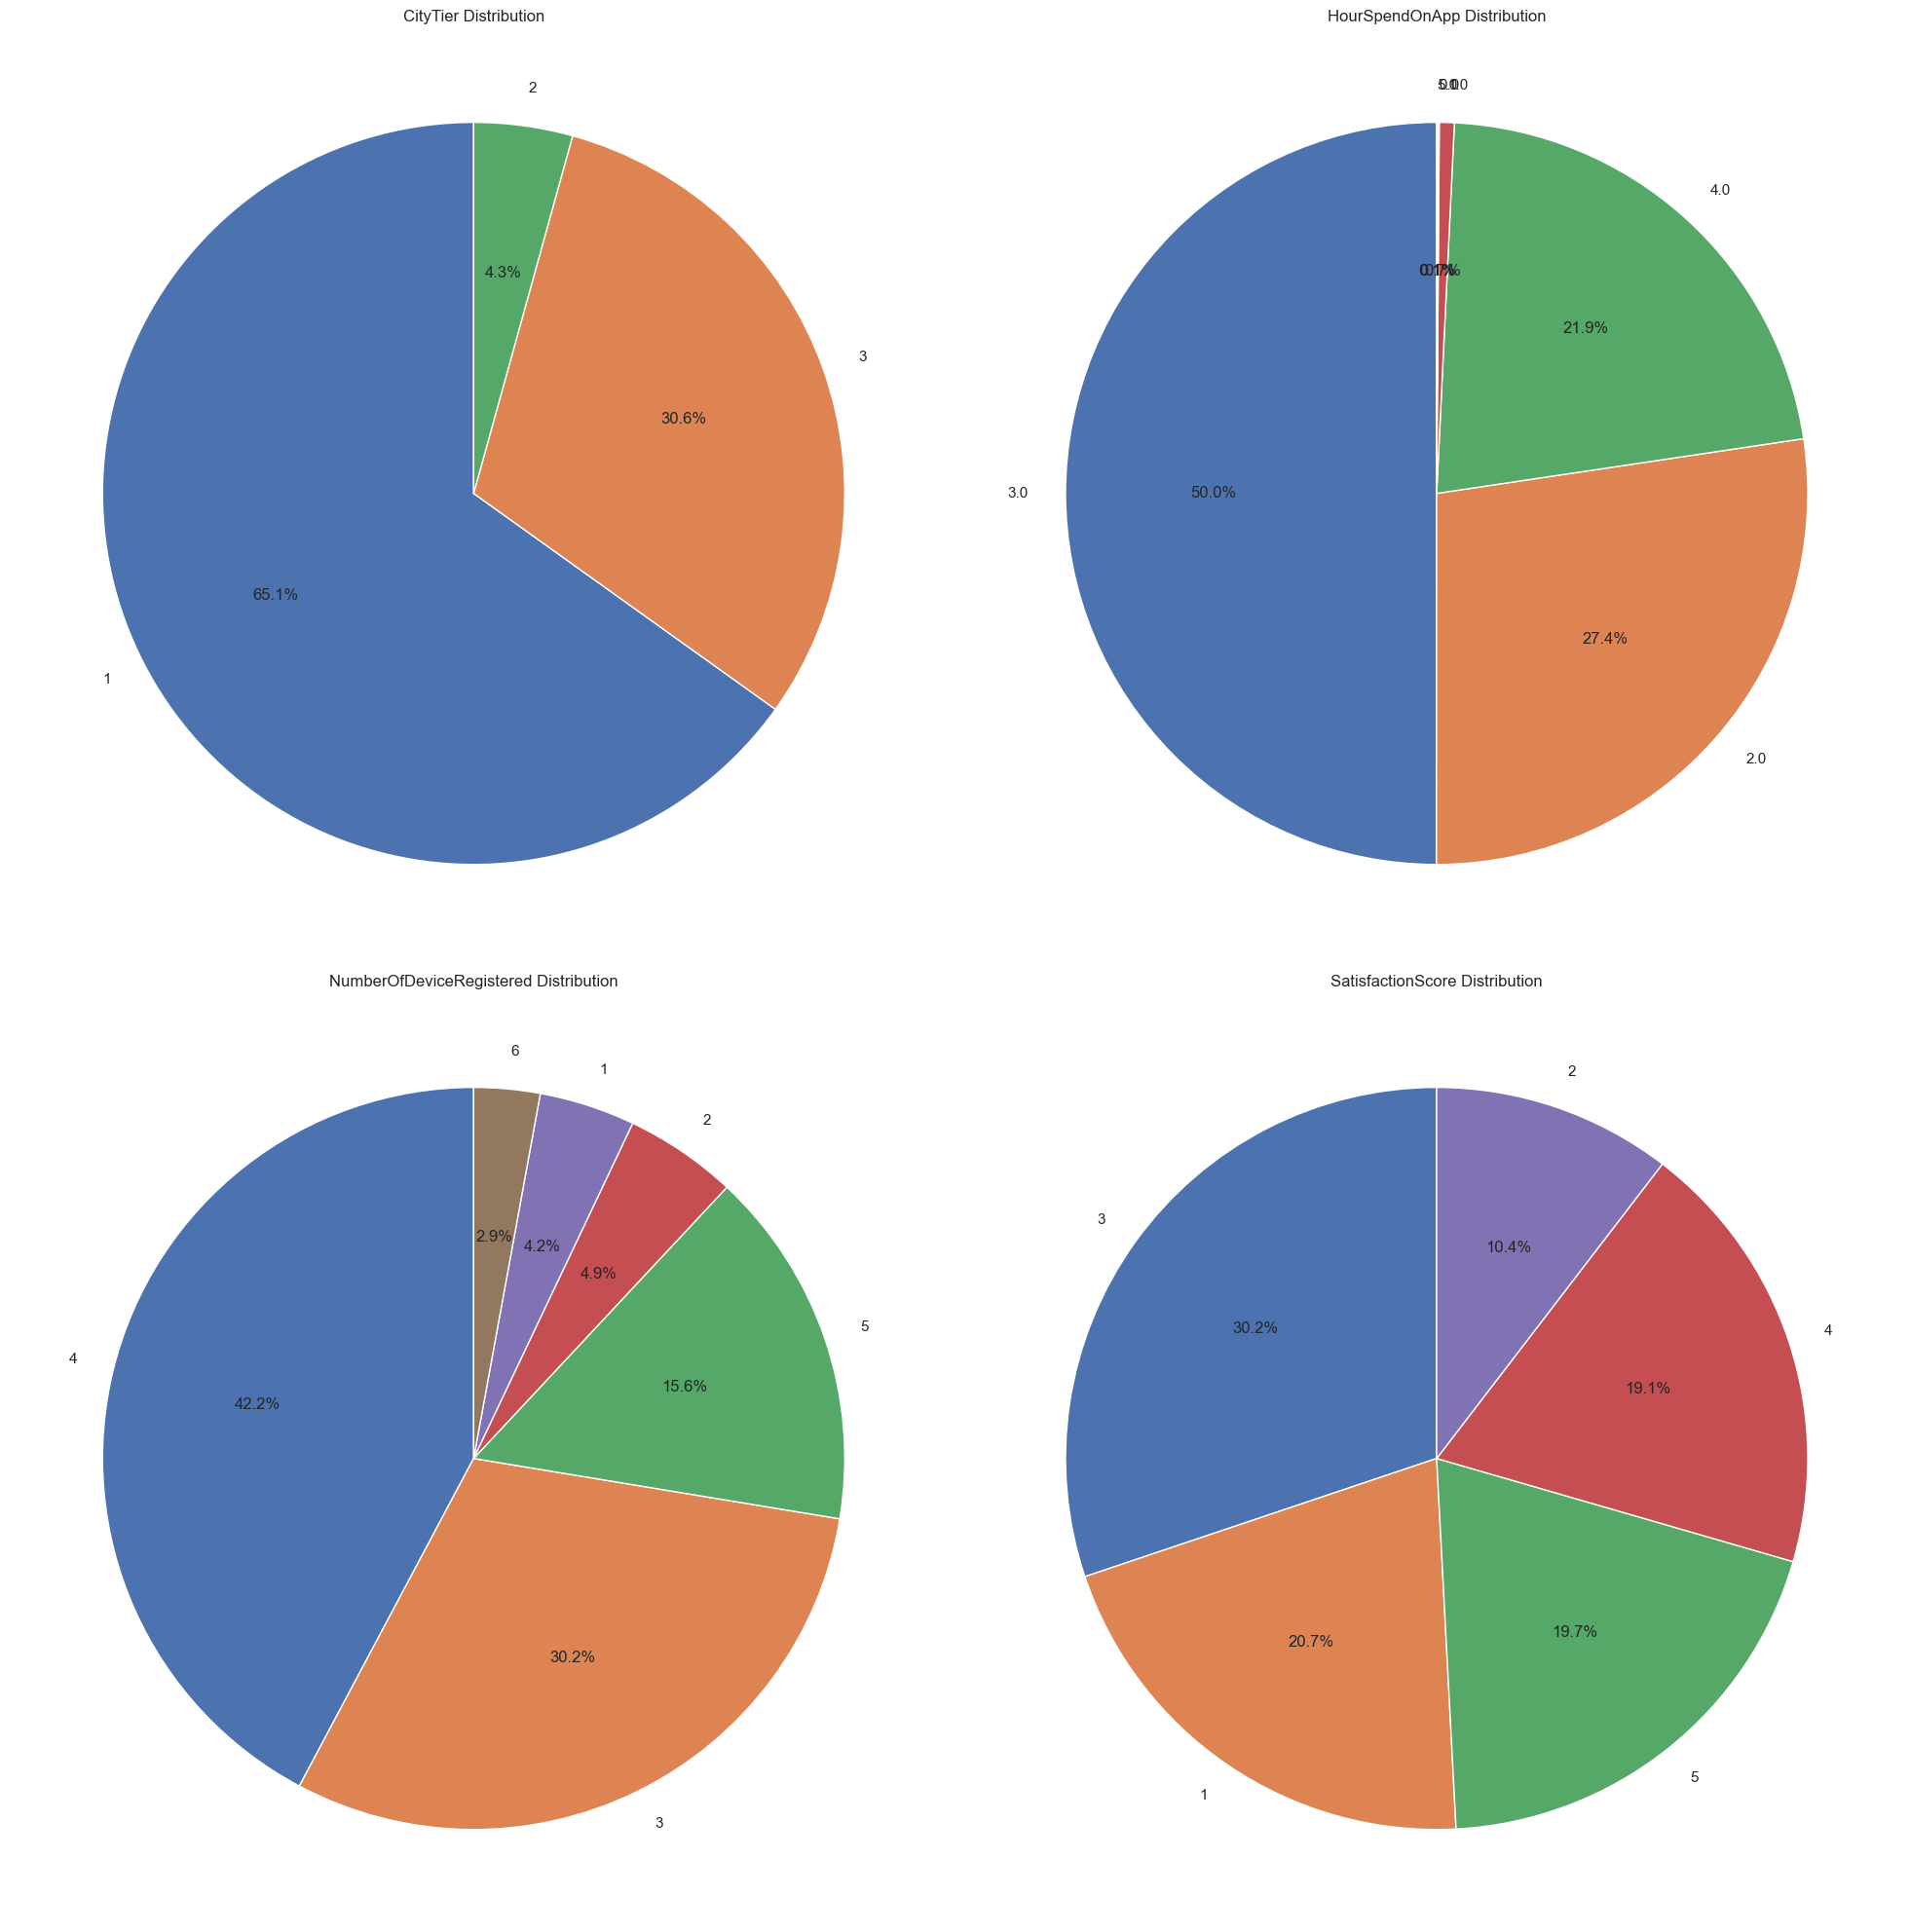

In [8]:
cat_vars = ['CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore']

# create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

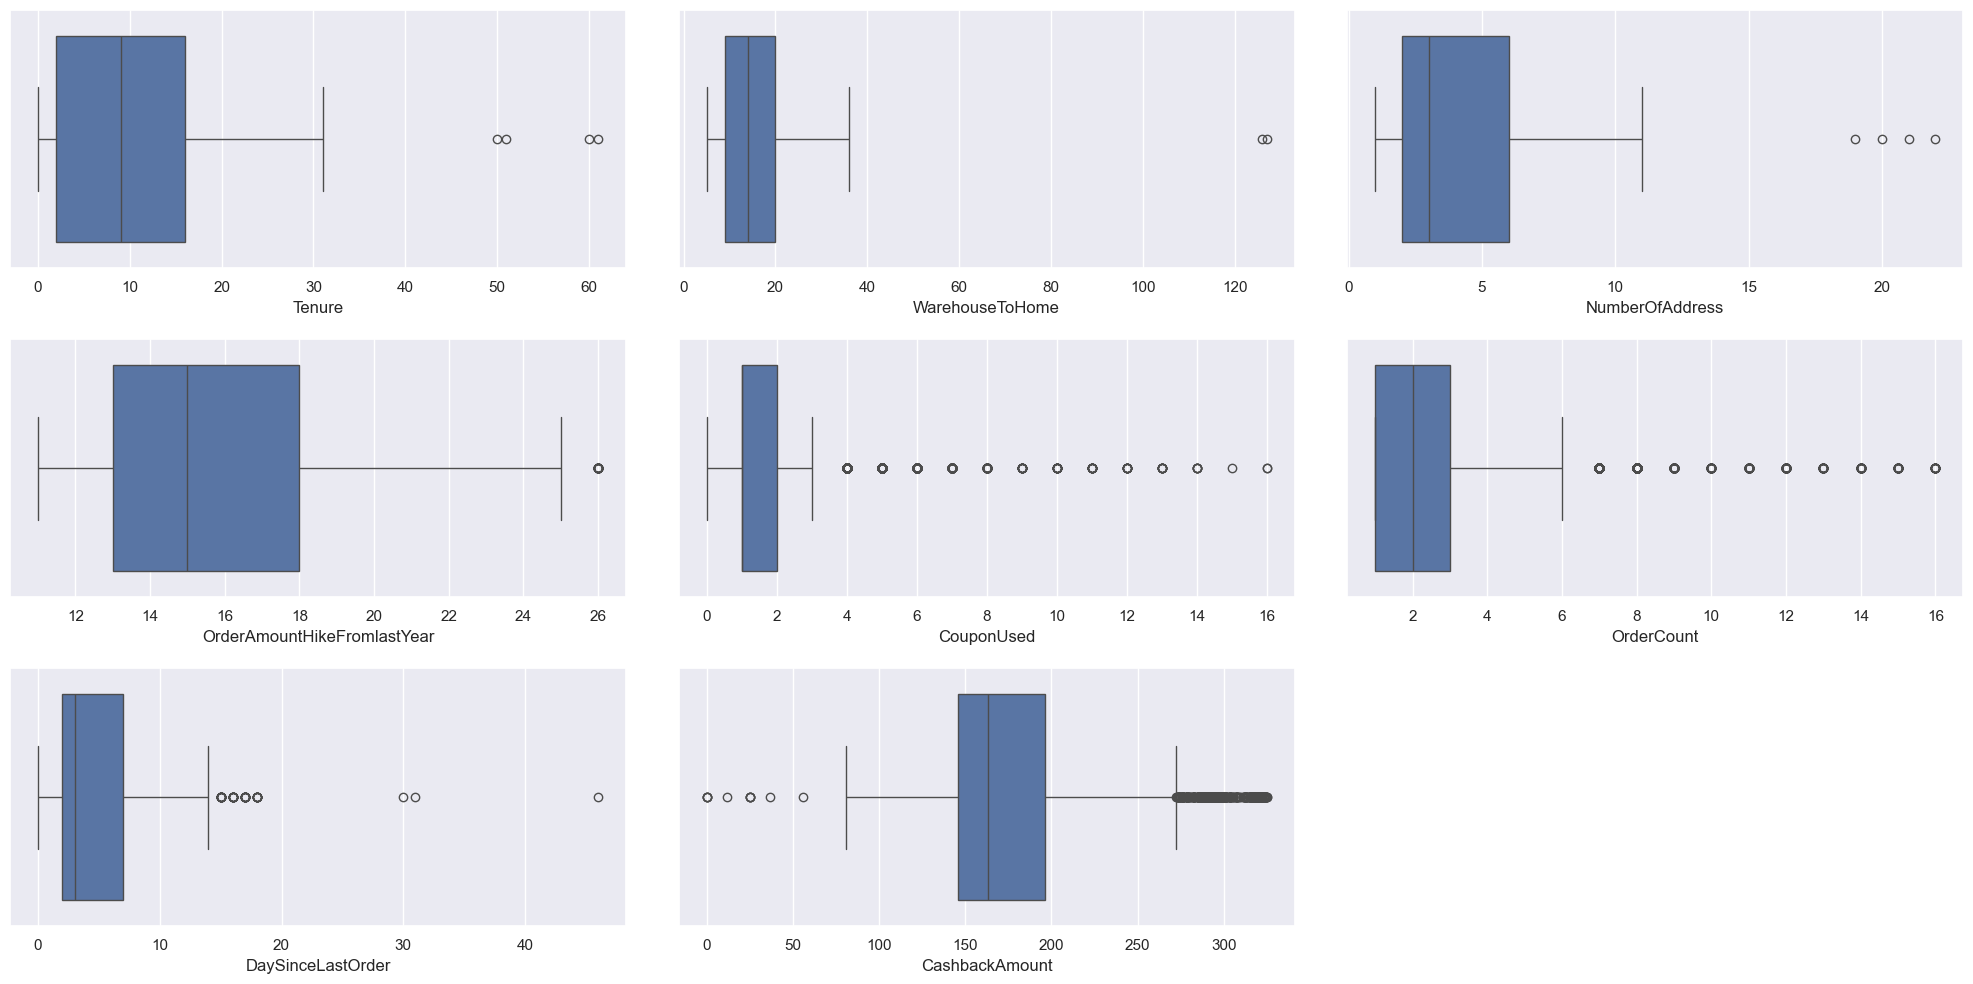

In [9]:
num_vars = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
           'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

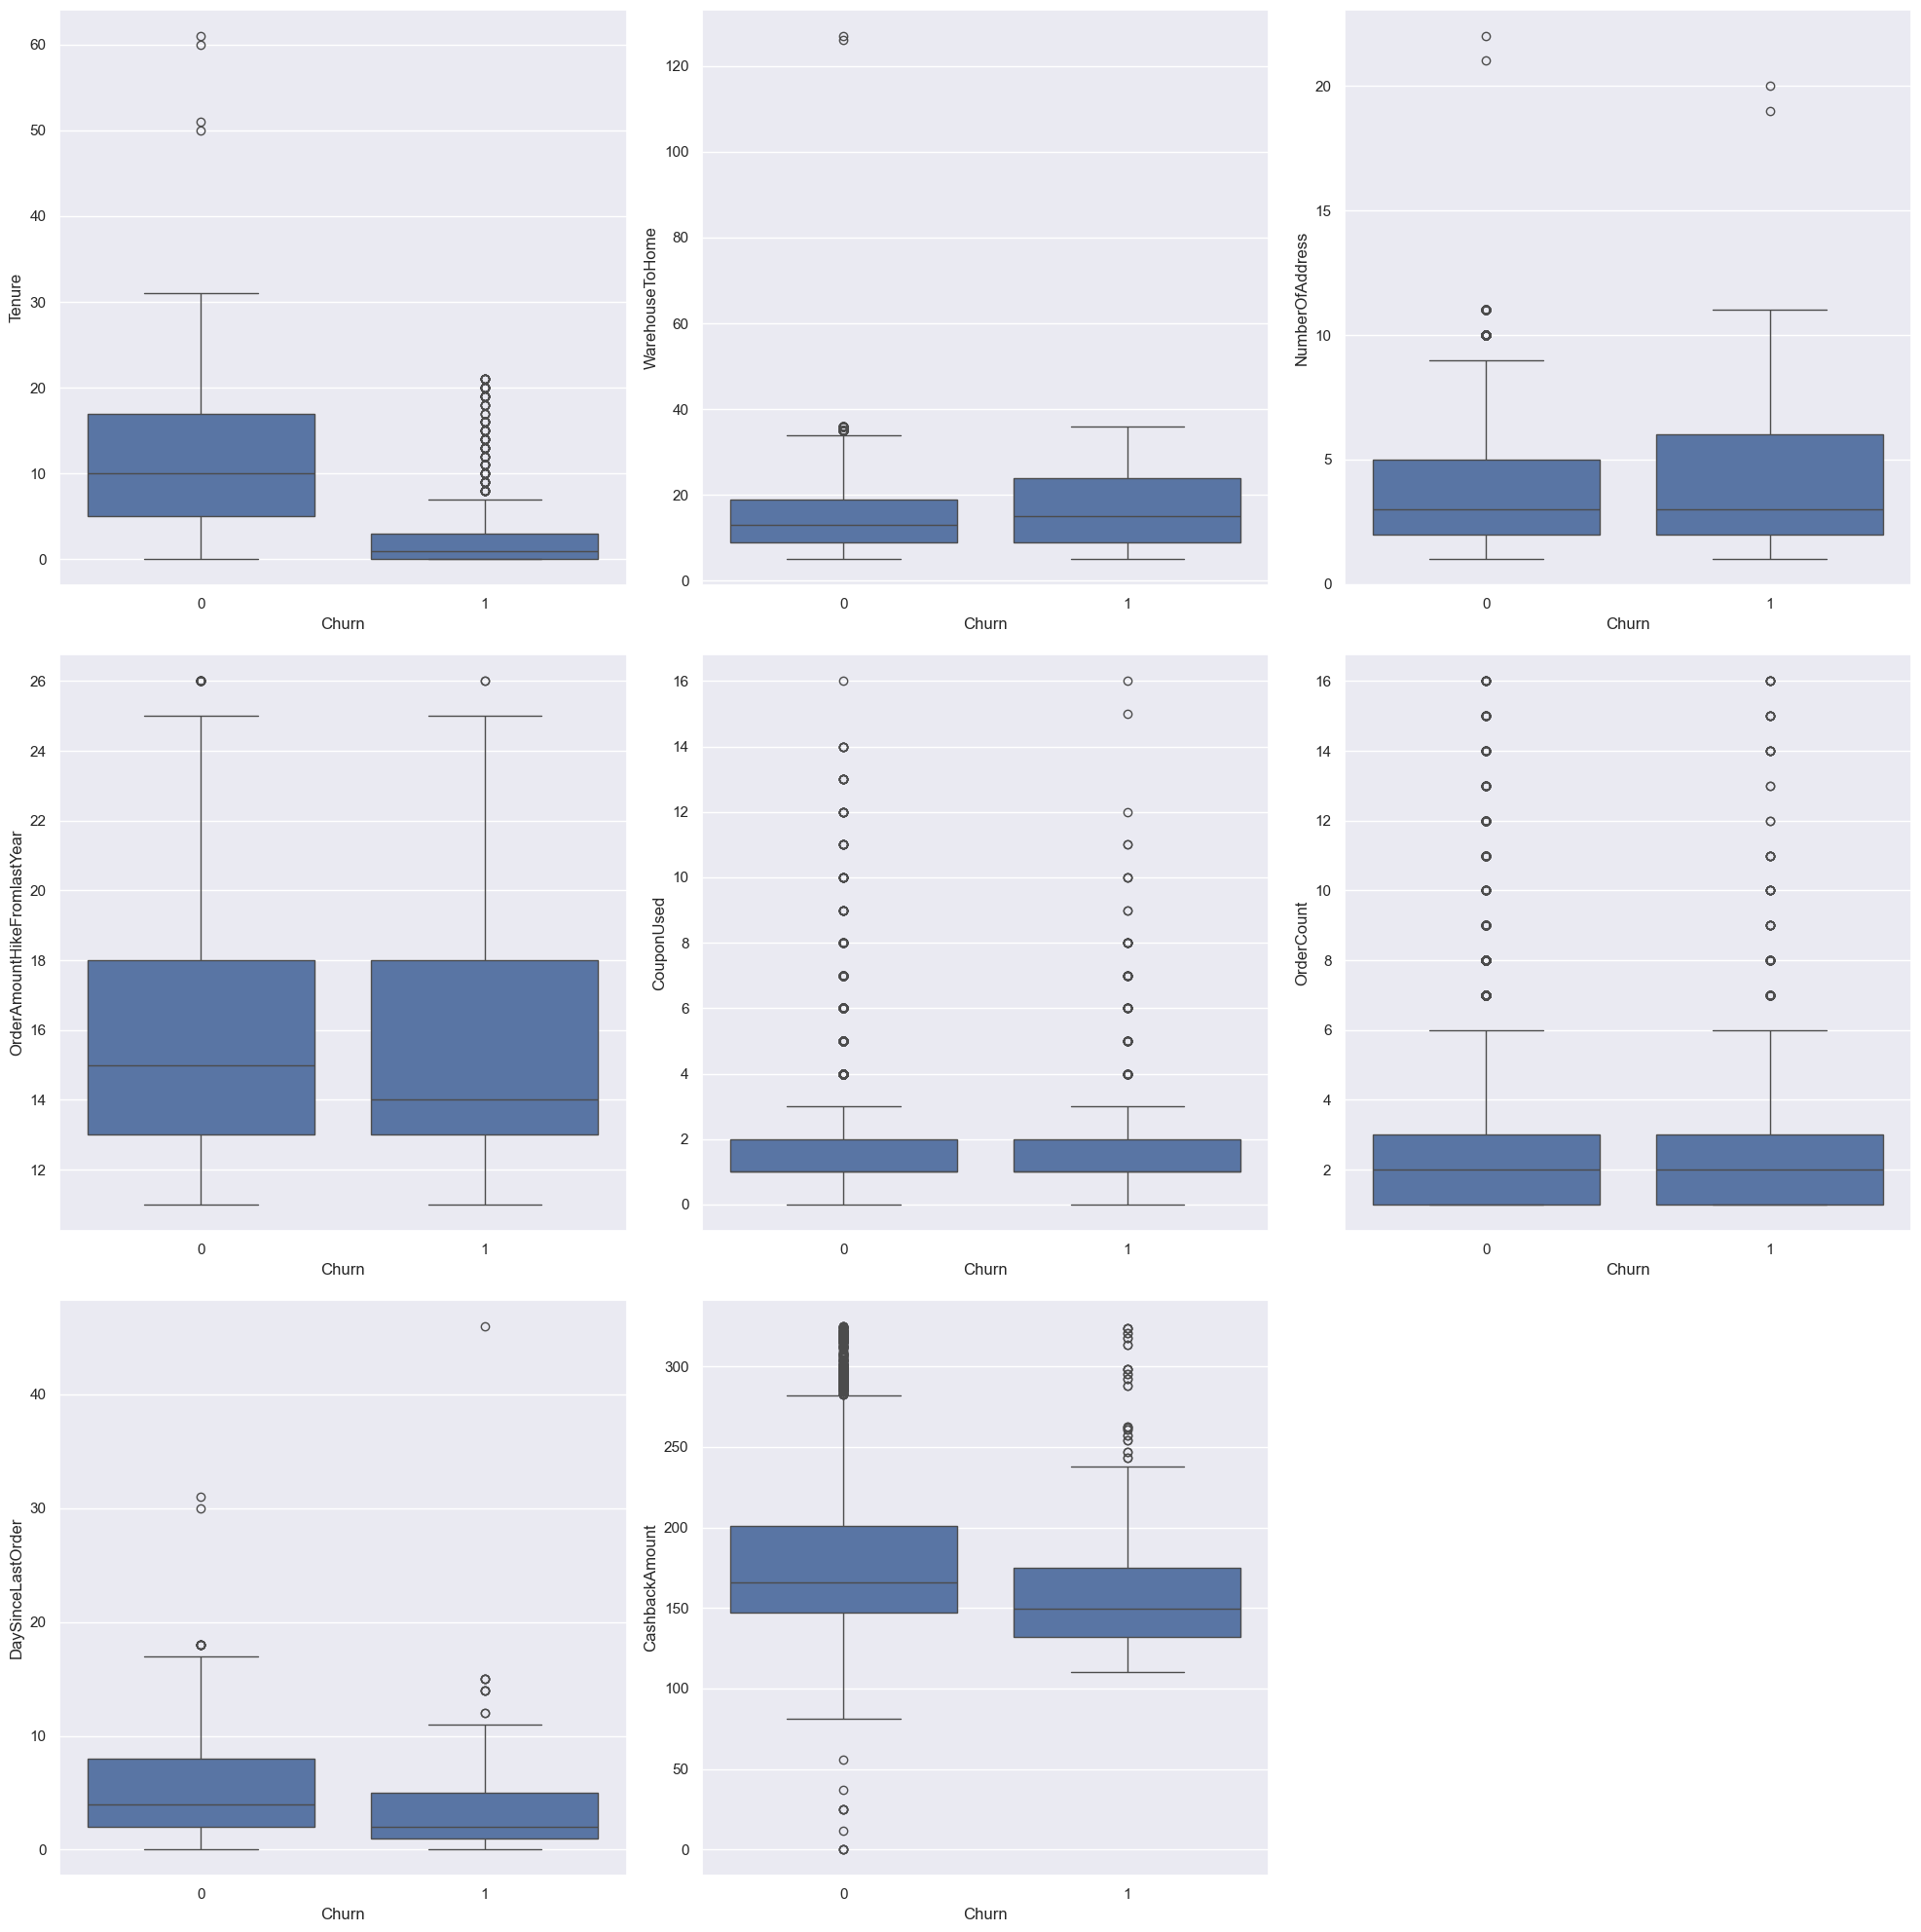

In [10]:
num_vars = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
           'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Churn', data=df, ax=axs[i])

fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

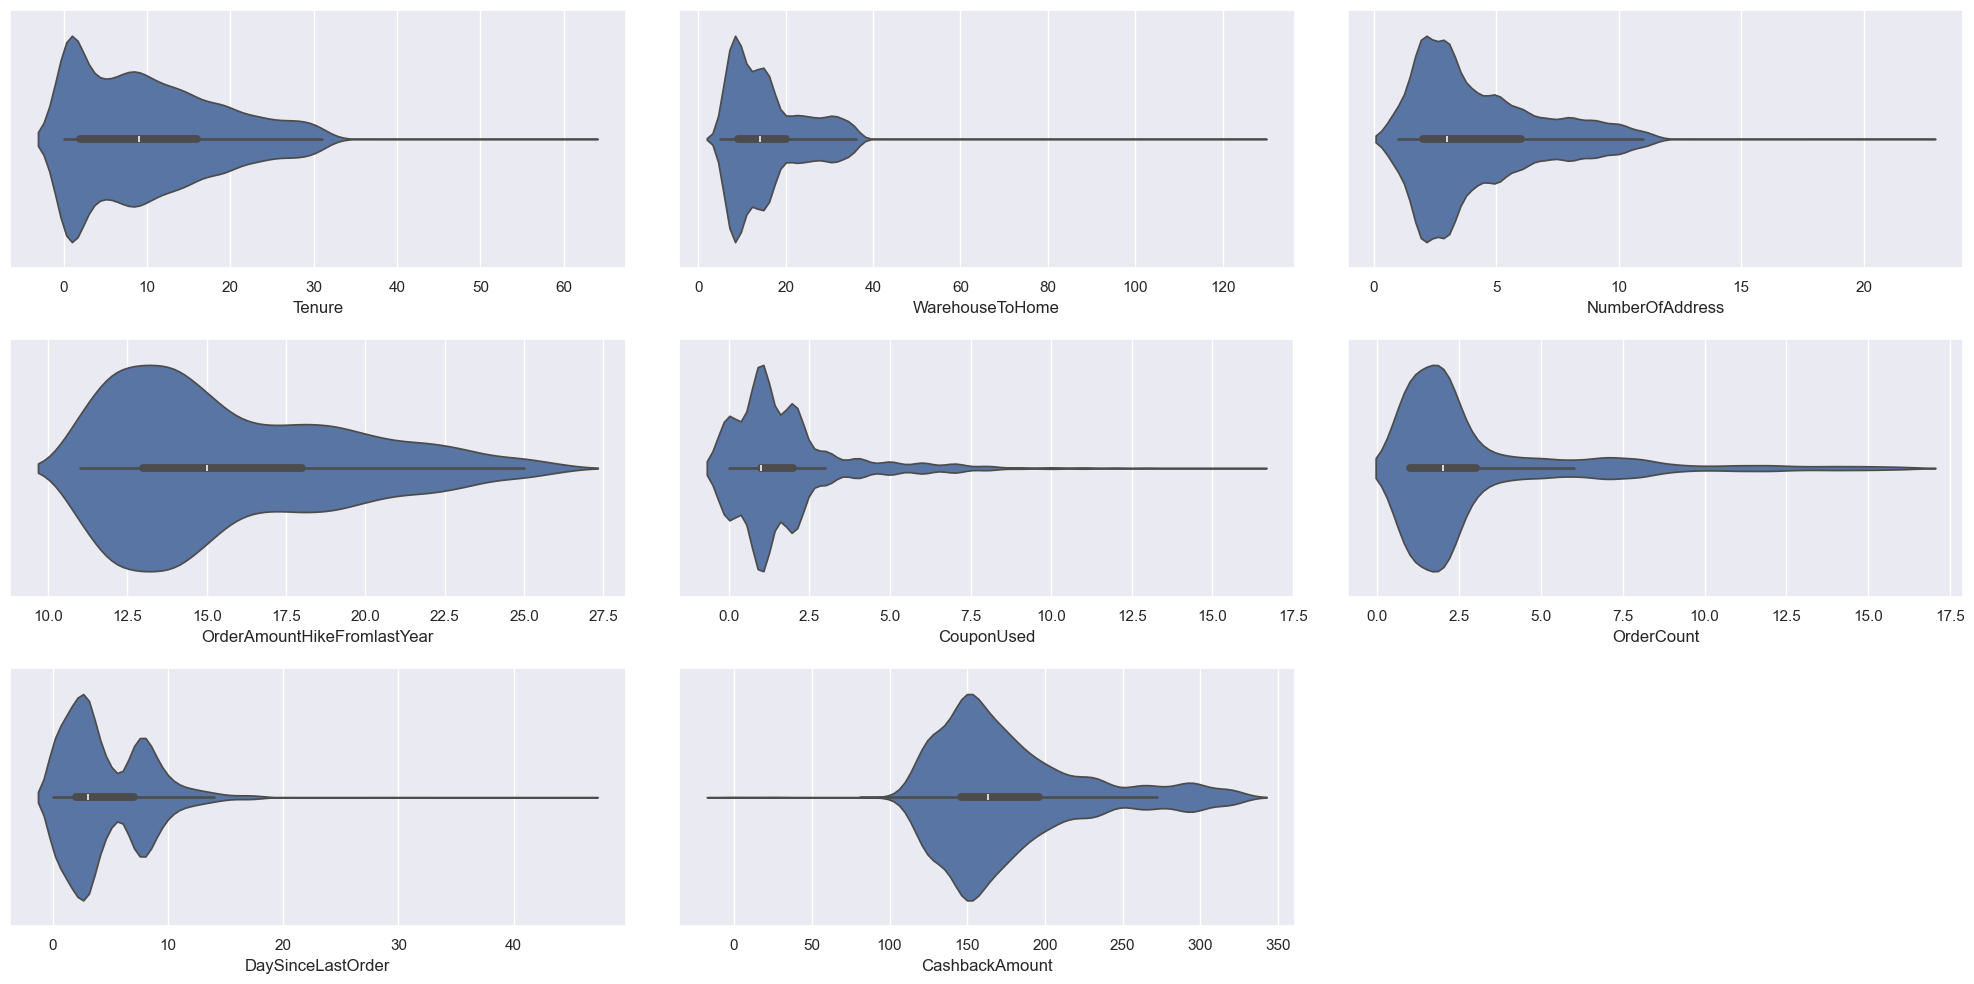

In [11]:
num_vars = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
           'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

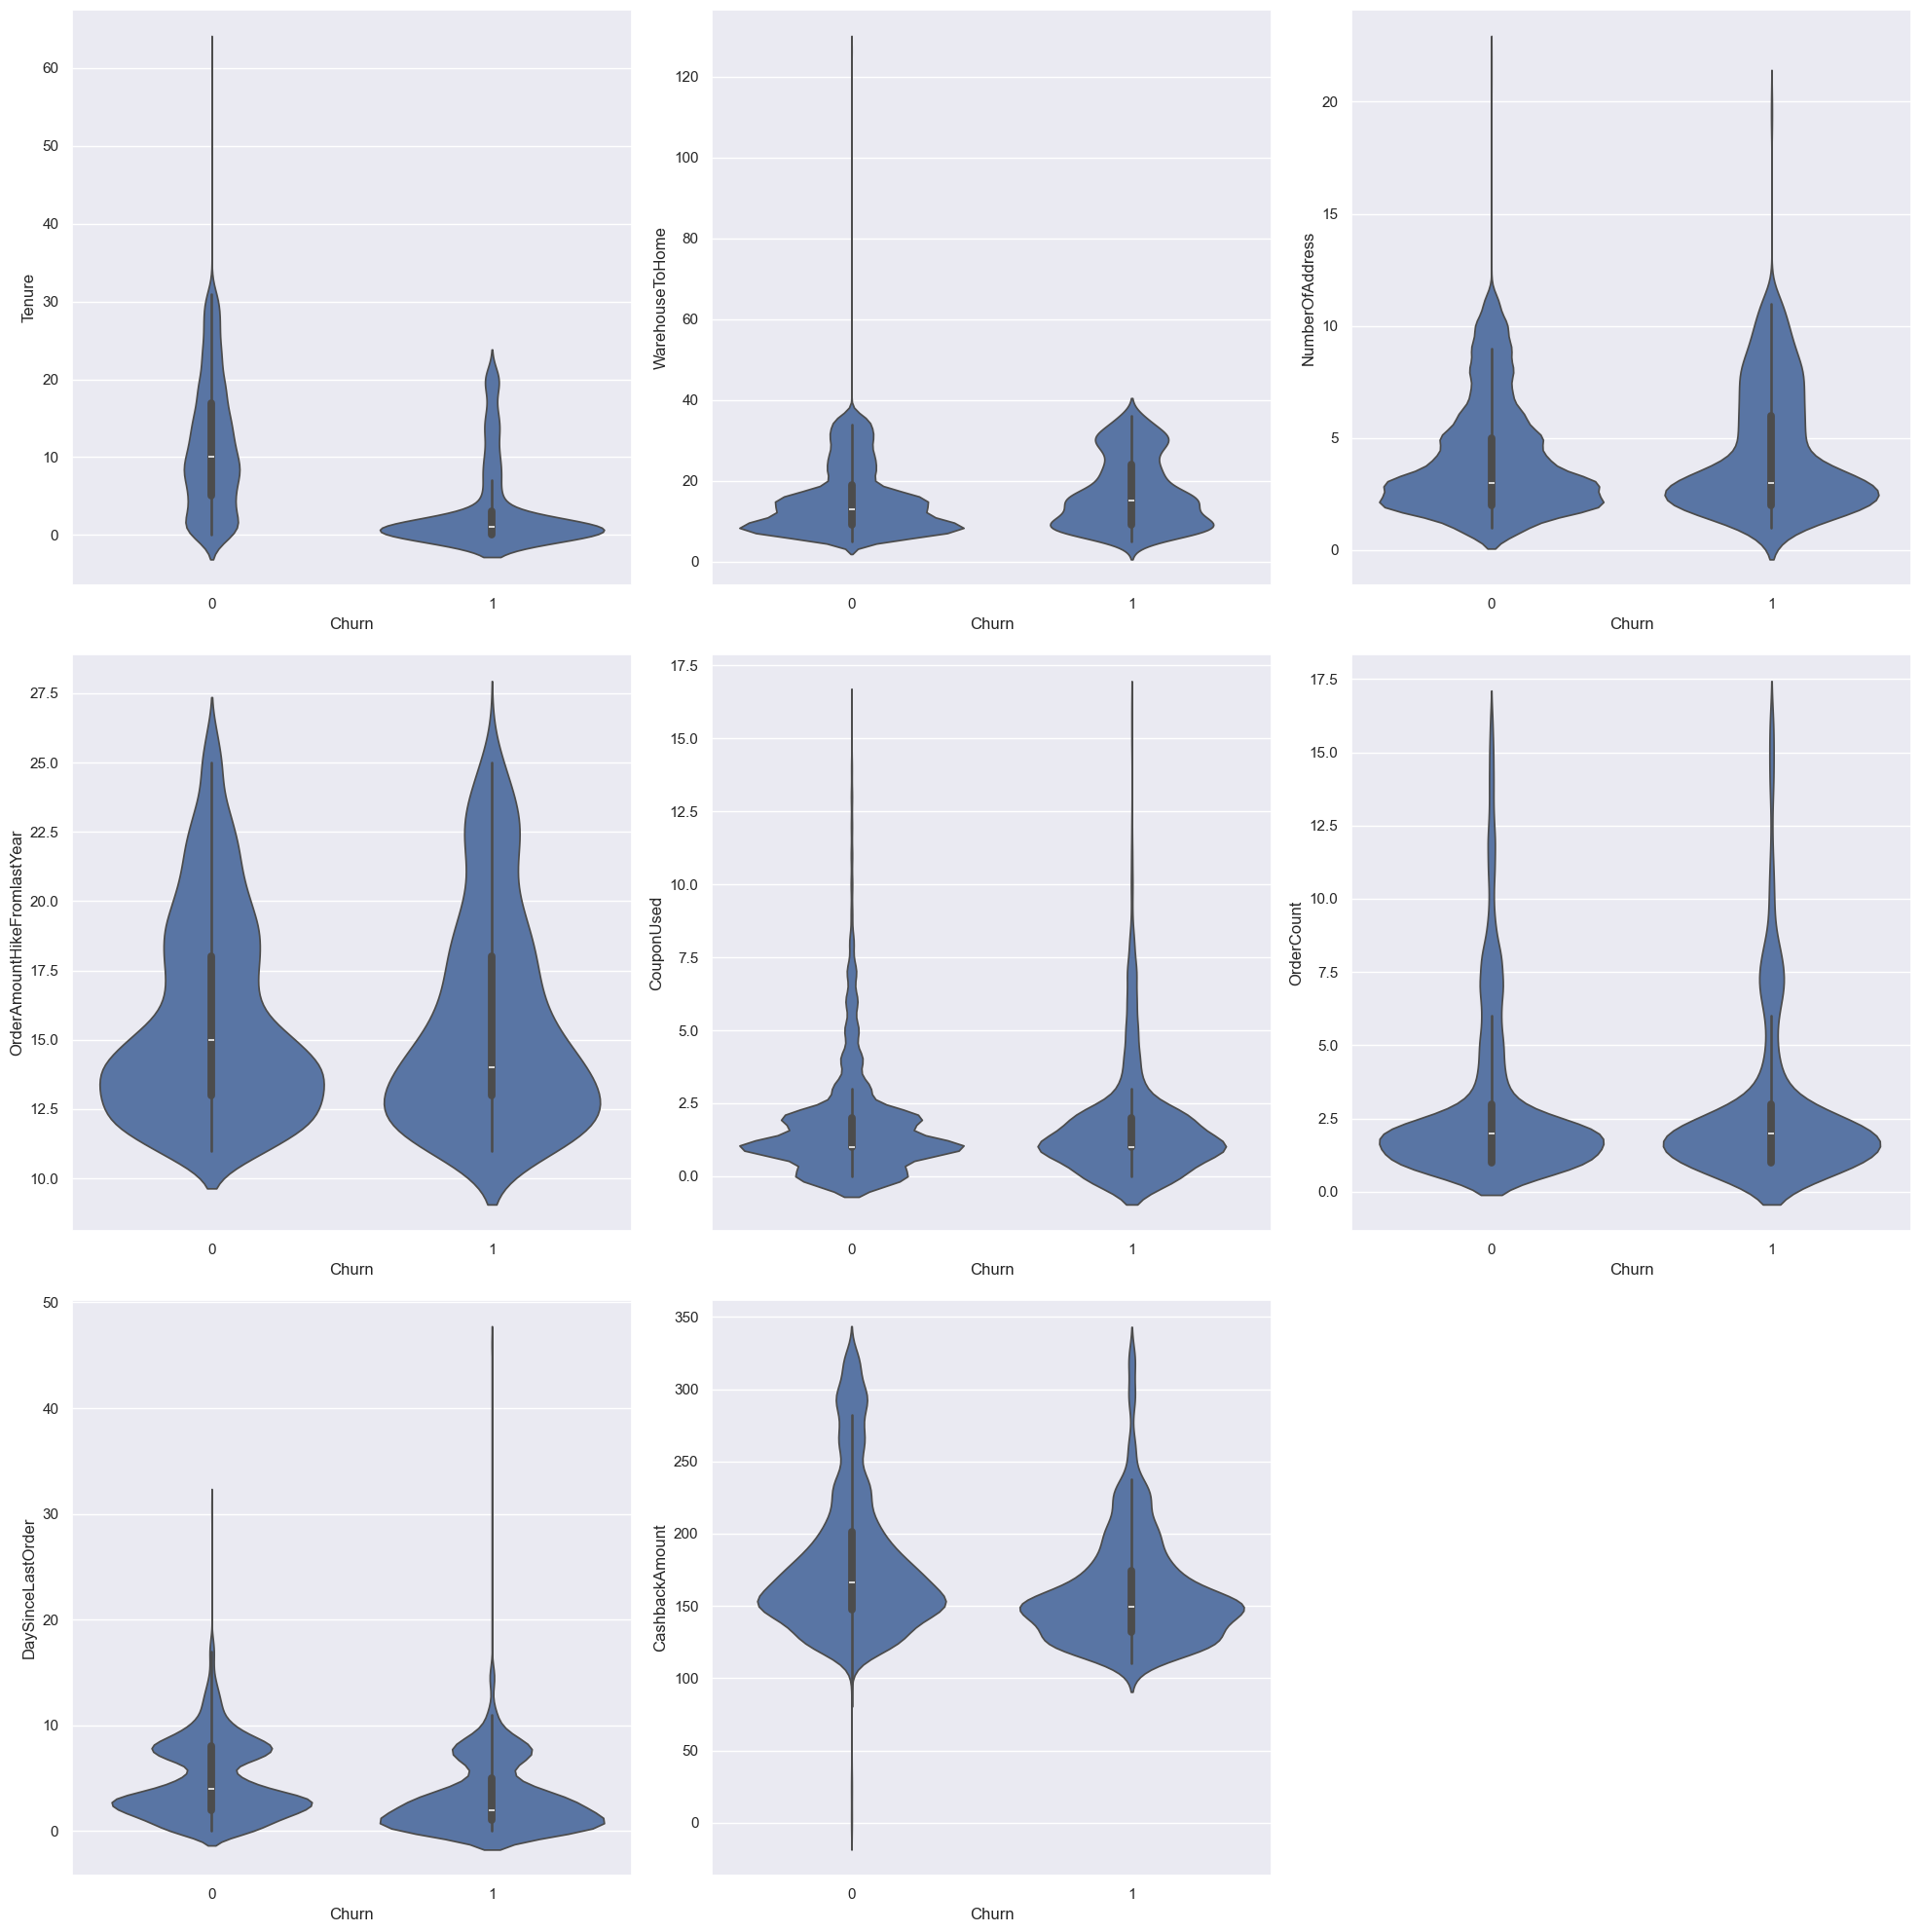

In [12]:
num_vars = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
           'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, x='Churn', ax=axs[i])

fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

<Axes: xlabel='WarehouseToHome', ylabel='CashbackAmount'>

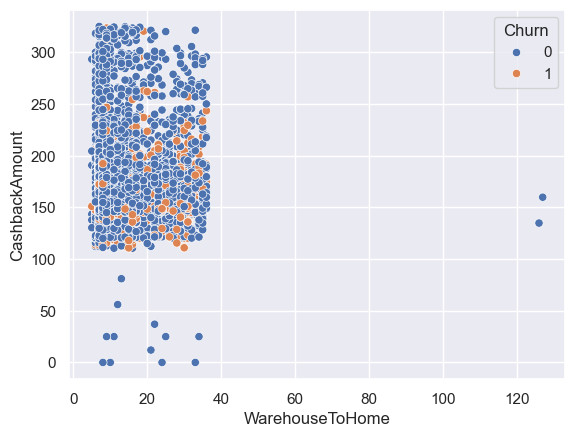

In [13]:
sns.scatterplot(x='WarehouseToHome', y='CashbackAmount', hue='Churn', data=df)

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='CashbackAmount'>

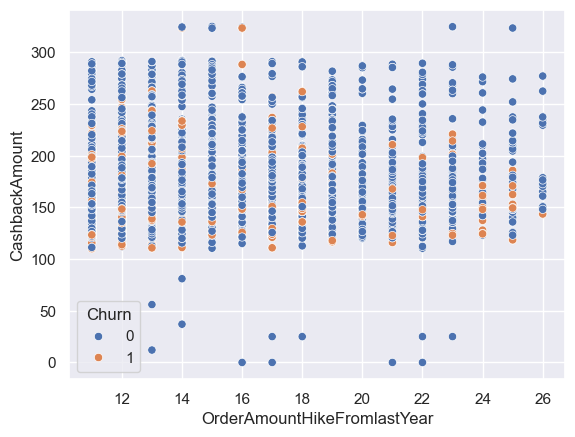

In [14]:
sns.scatterplot(x='OrderAmountHikeFromlastYear', y='CashbackAmount', hue='Churn', data=df)

<Axes: xlabel='DaySinceLastOrder', ylabel='CashbackAmount'>

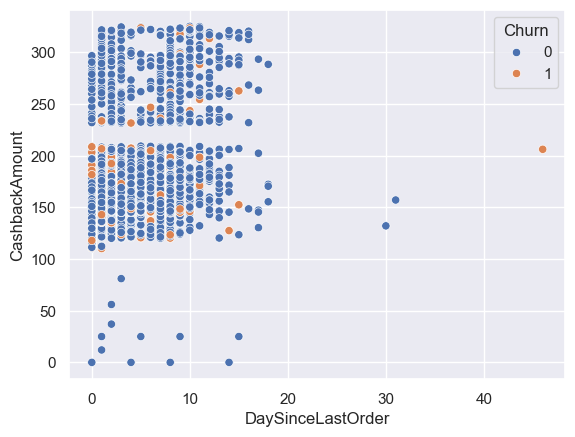

In [15]:
sns.scatterplot(x='DaySinceLastOrder', y='CashbackAmount', hue='Churn', data=df)

<Axes: xlabel='NumberOfAddress', ylabel='CashbackAmount'>

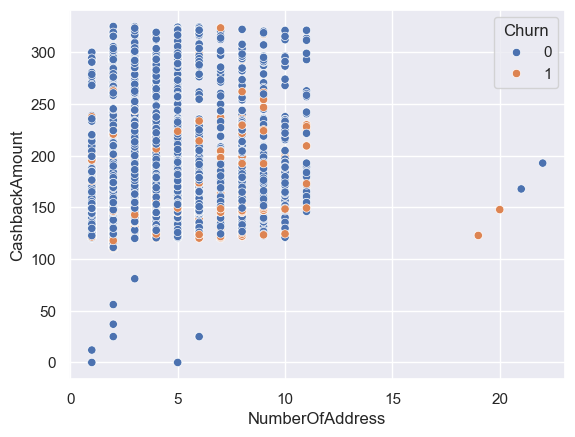

In [16]:
sns.scatterplot(x='NumberOfAddress', y='CashbackAmount', hue='Churn', data=df)

# Data Preprocessing Part 2

In [17]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.689165
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
WarehouseToHome                4.458259
dtype: float64

In [18]:
# fill null value with median
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)

In [19]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Label Encoding for Object datatype

In [20]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


In [21]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

PreferredLoginDevice: [1 2 0]
PreferredPaymentMode: [4 6 0 2 5 1 3]
Gender: [0 1]
PreferedOrderCat: [2 3 4 5 0 1]
MaritalStatus: [2 0 1]


# Correlation Heatmap

<Axes: >

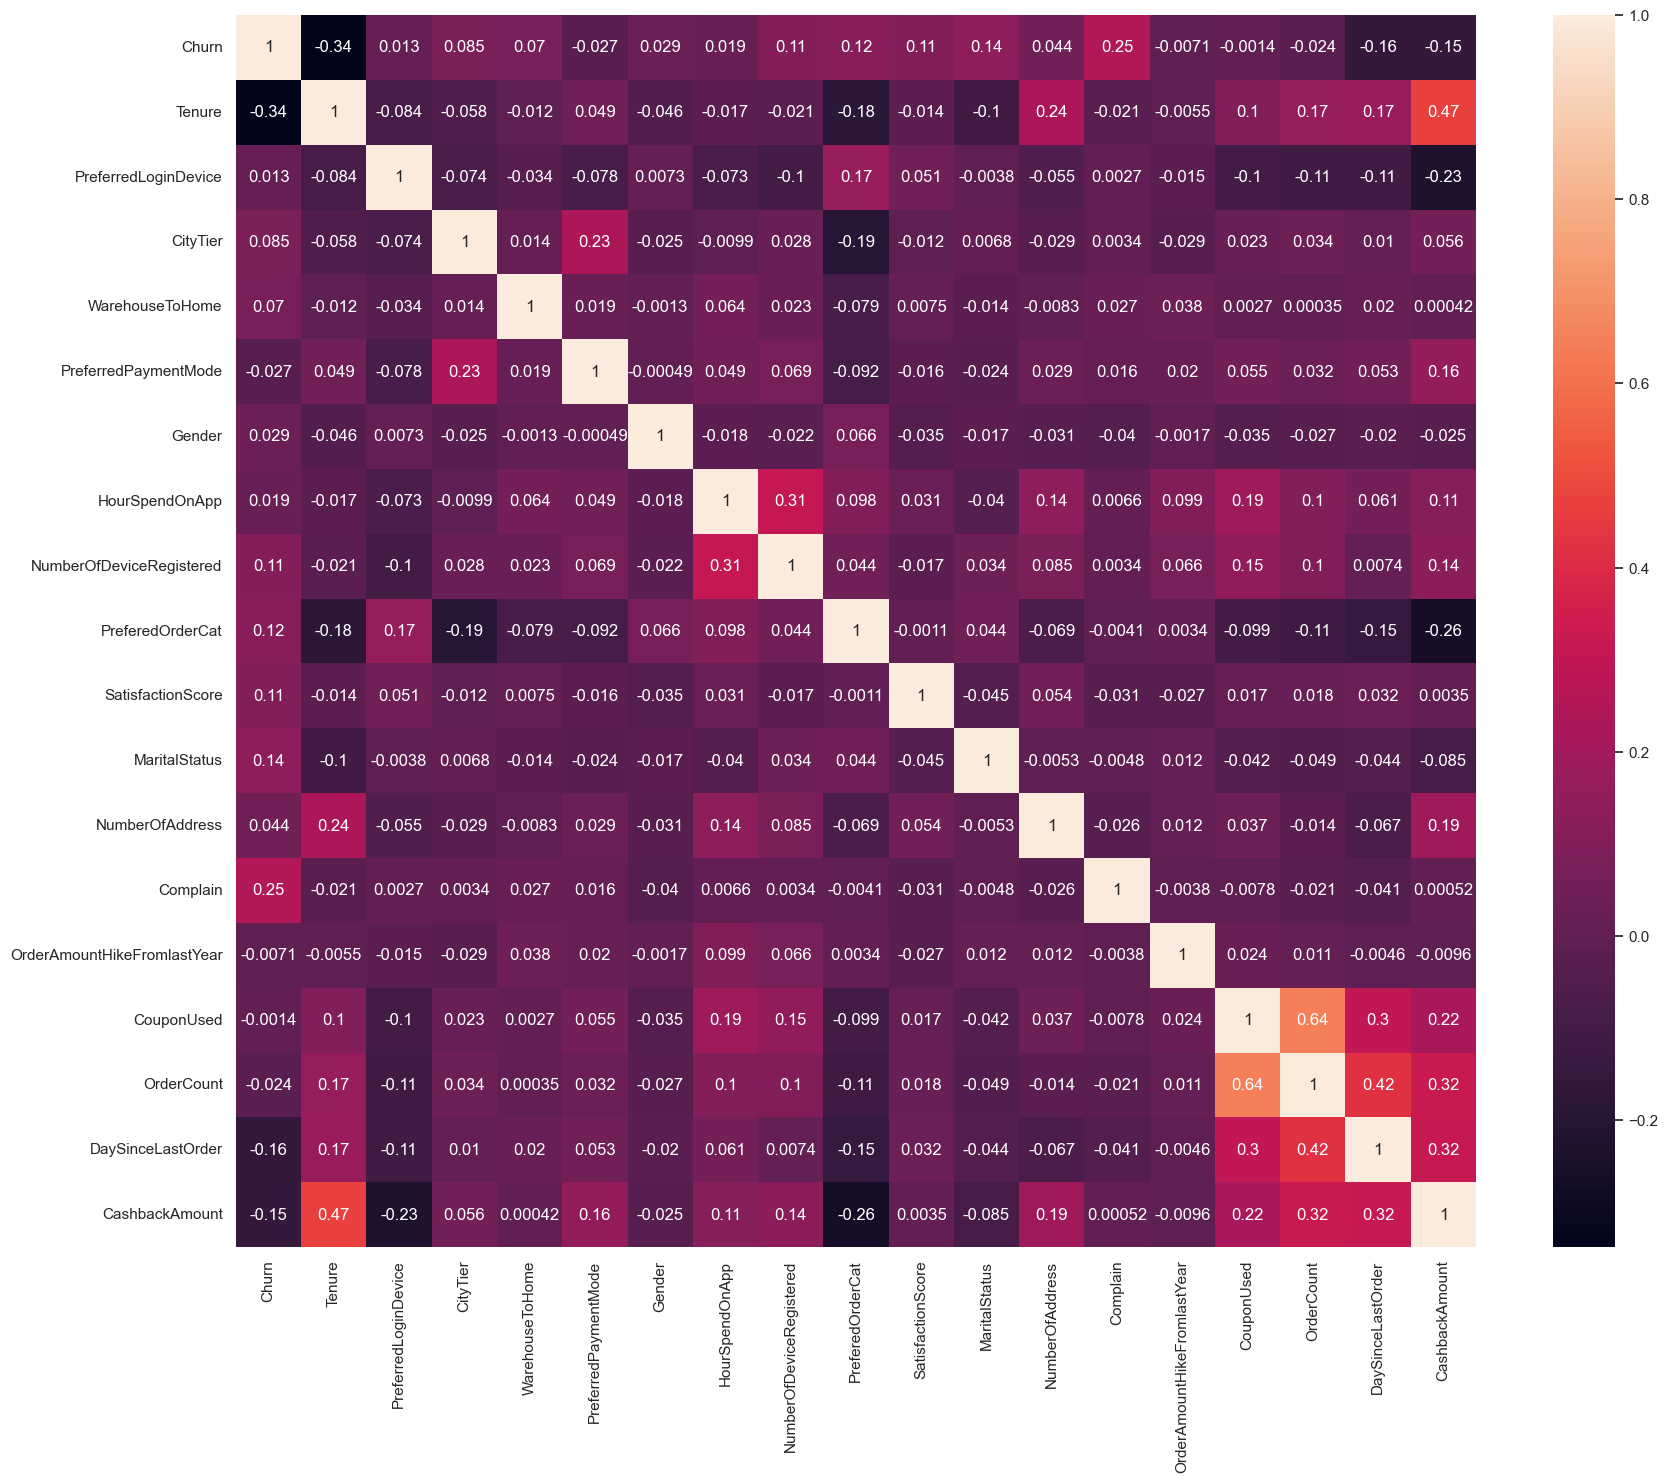

In [22]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remove Outlier in Train Data using Z-Score

In [24]:
from sklearn.model_selection import train_test_split

# Select the column for outlier removal
selected_column = ['WarehouseToHome', 'DaySinceLastOrder', 'CouponUsed', 'OrderCount']

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Calculate the z-scores for the selected column in the training set
train_z_scores = np.abs((train_df[selected_column] - train_df[selected_column].mean()) / train_df[selected_column].std())

# Set the threshold for defining outliers (e.g., z-score > 3)
threshold = 3

# Filter the training DataFrame, removing rows with z-scores above the threshold in the selected column
train_df_no_outliers = train_df[train_z_scores <= threshold]

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=42)

In [27]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 88.01 %


In [28]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8801065719360568
Precision Score :  0.8801065719360568
Recall Score :  0.8801065719360568
Jaccard Score :  0.7858842188739096
Log Loss :  4.321397164769818


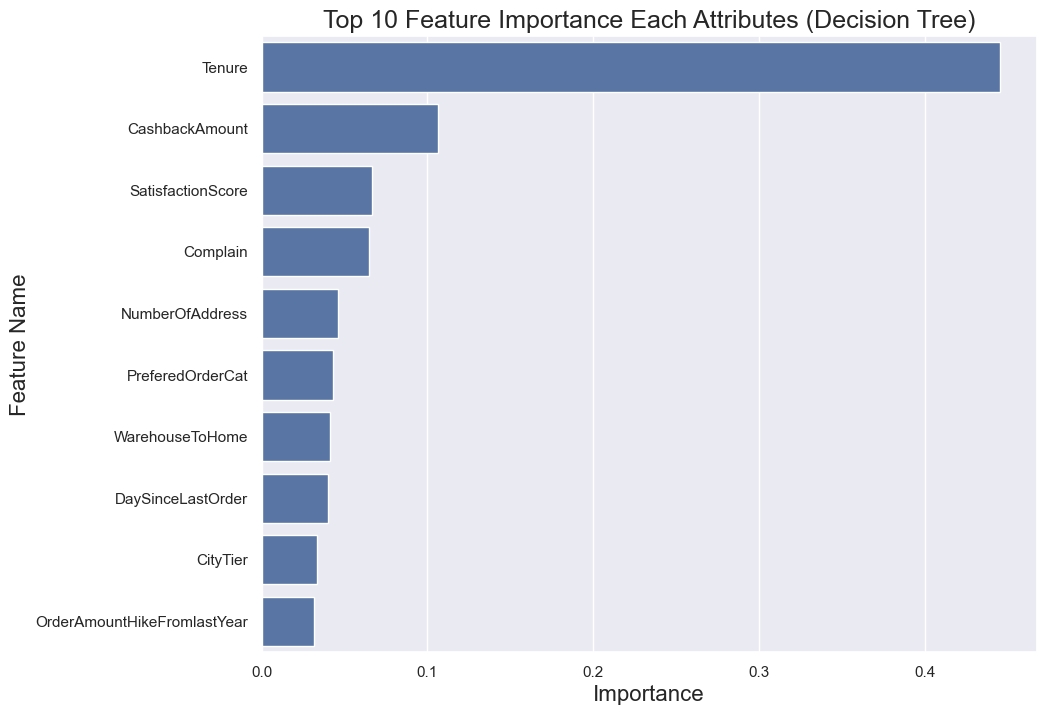

In [29]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [30]:
#!pip install shap


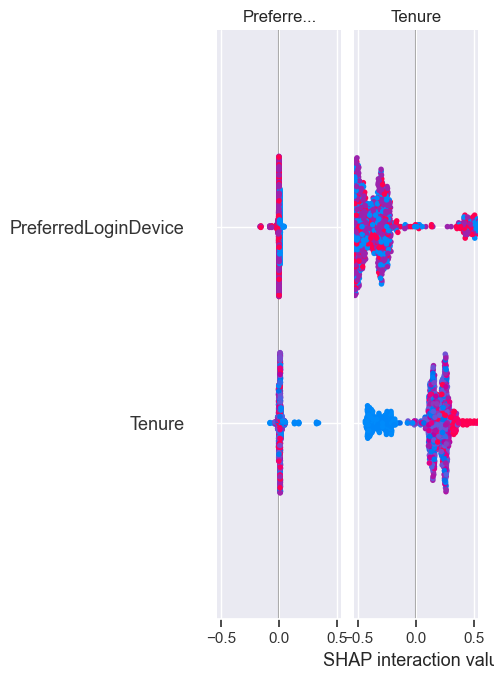

(1126, 18, 2) (1126, 18)


In [31]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
print(np.array(shap_values).shape, X_test.shape)



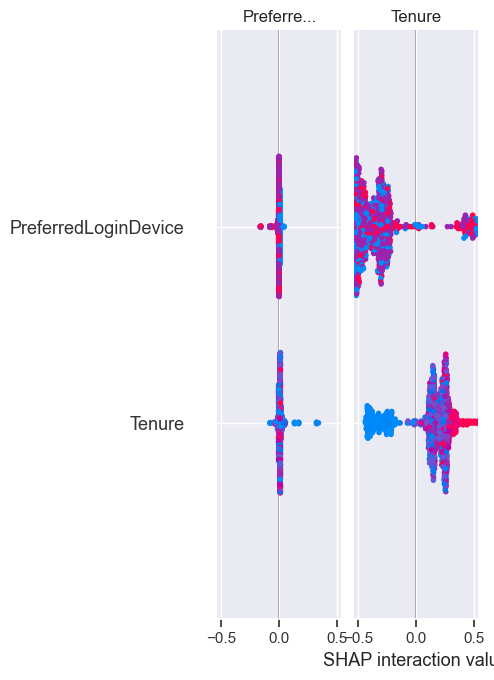

compute SHAP values;;;;;;;;;;;;;;;;


In [32]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test.values, feature_names=X_test.columns)
print('compute SHAP values;;;;;;;;;;;;;;;;')


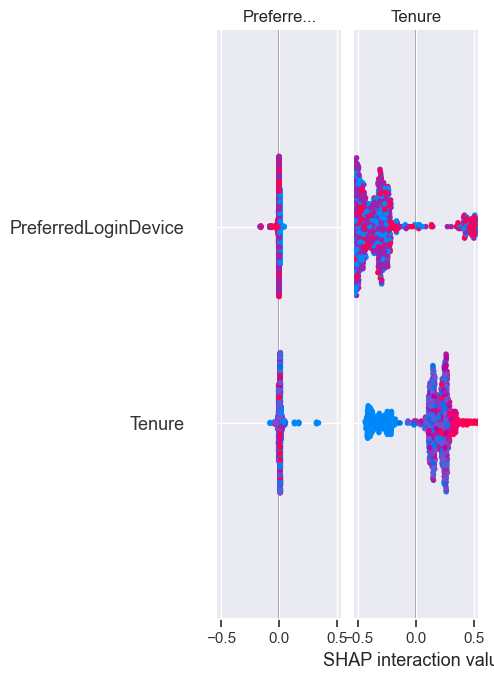

In [33]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test.values, feature_names=X_test.columns, plot_type="violin")


Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8801065719360568')

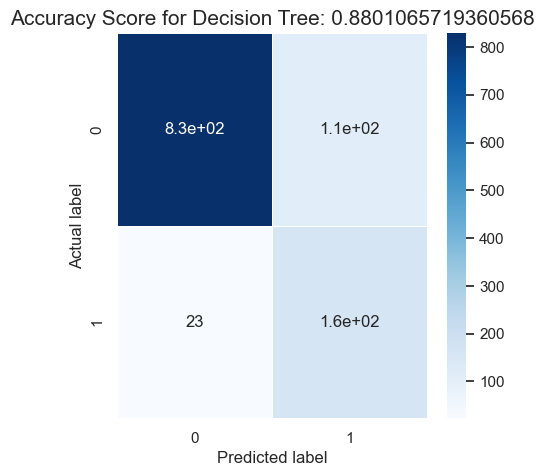

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

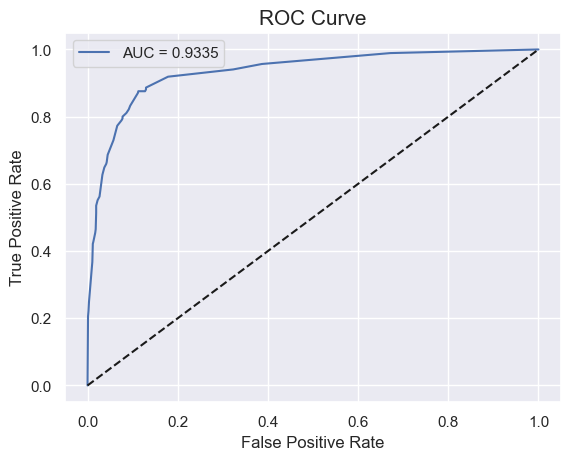

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}


In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [38]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 97.6 %


In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9760213143872114
Precision Score :  0.9760213143872114
Recall Score :  0.9760213143872114
Jaccard Score :  0.9531656548135299
Log Loss :  0.8642794329539639


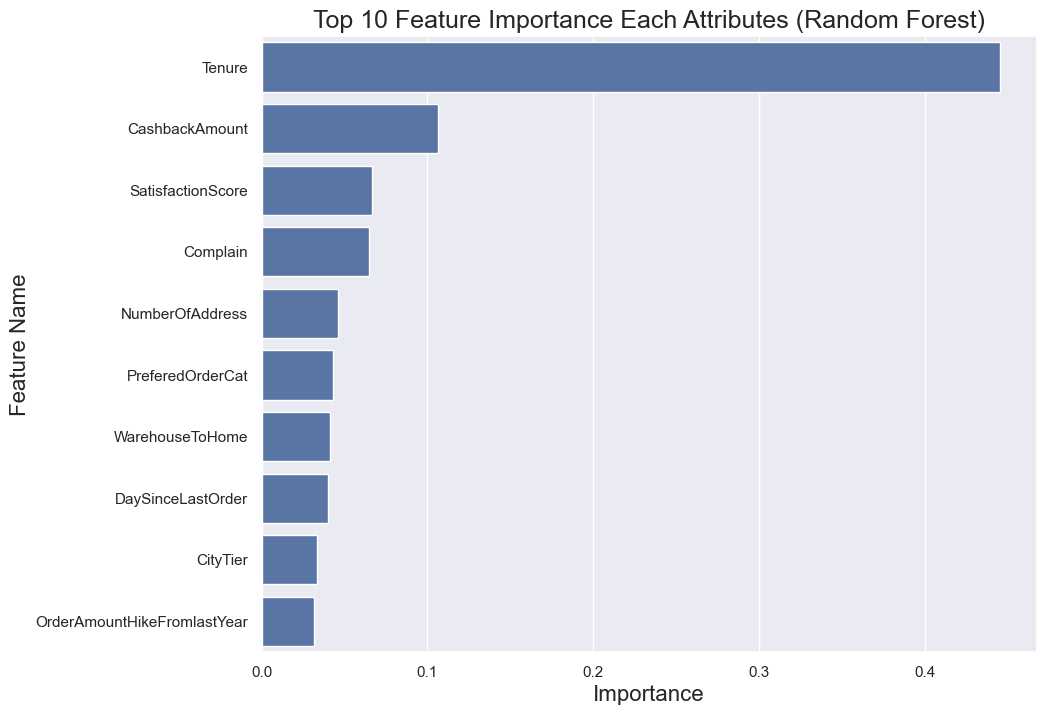

In [40]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

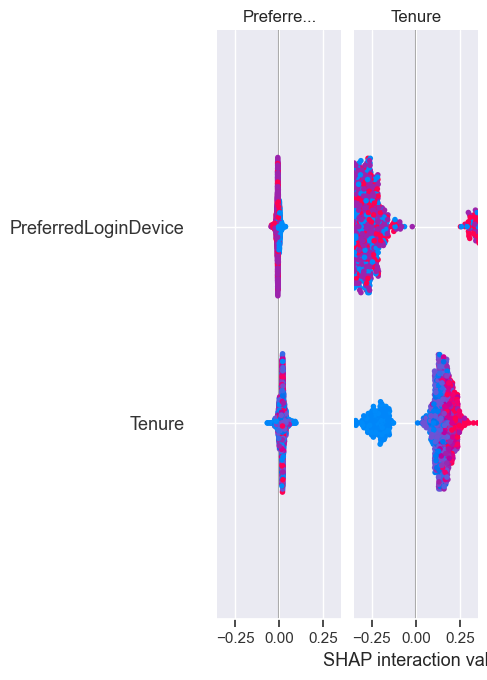

In [41]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

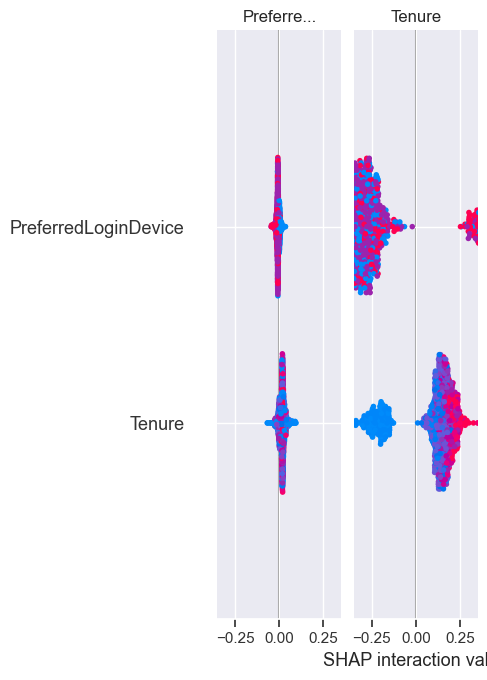

In [42]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test.values, feature_names=X_test.columns)

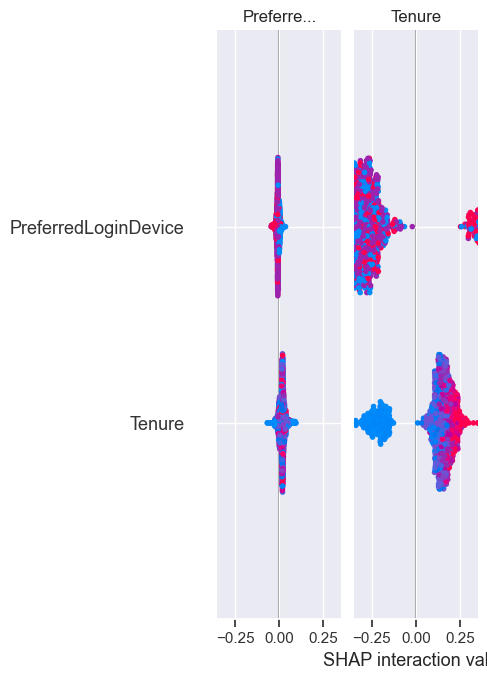

(1126, 18, 2) (1126, 18)


In [43]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test.values, feature_names=X_test.columns, plot_type="violin")
print(np.array(shap_values).shape, X_test.shape)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.9760213143872114')

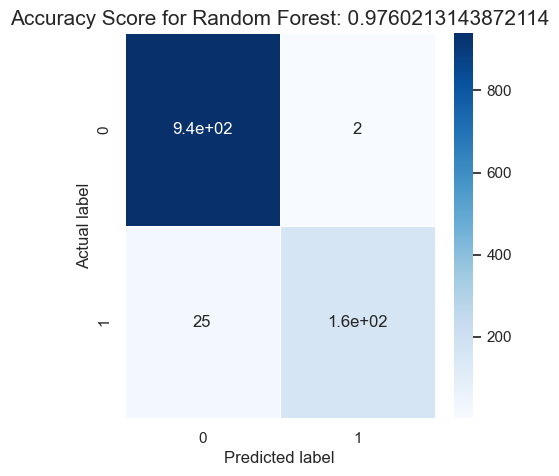

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

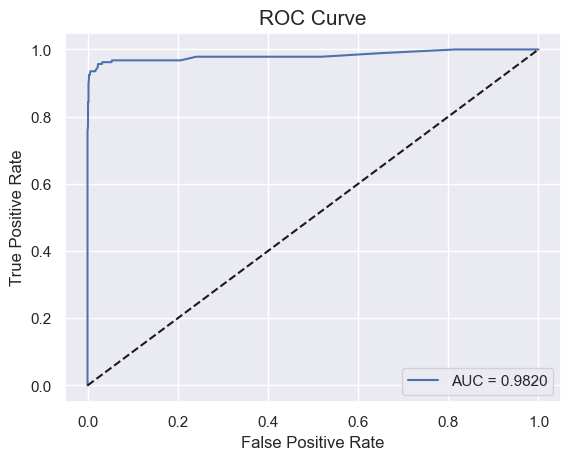

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [46]:
#!pip install xgboost

# XGBoost

In [47]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 97.78 %


In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.977797513321492
Precision Score :  0.977797513321492
Recall Score :  0.977797513321492
Jaccard Score :  0.9565595134665508
Log Loss :  0.8002587342166333


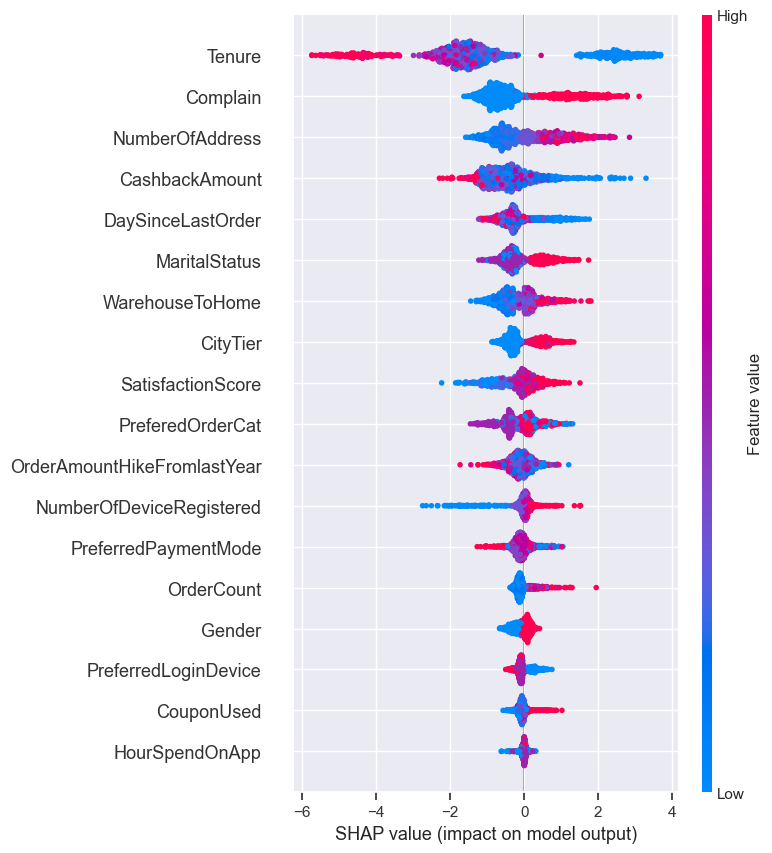

In [51]:
import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accuracy Score for XGBoost: 0.977797513321492')

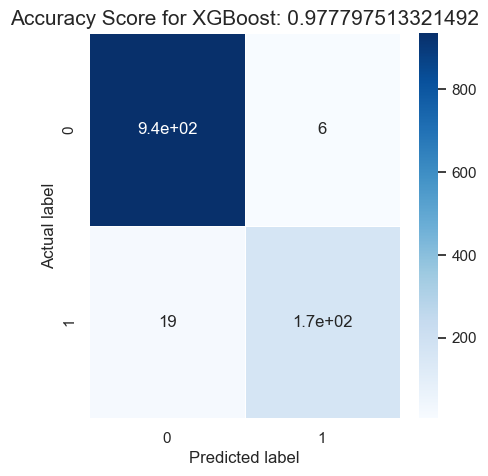

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for XGBoost: {0}'.format(xgb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

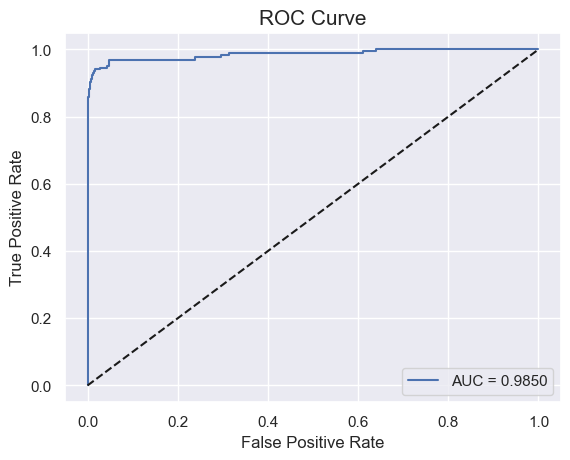

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# 🔍 Customer Churn Prediction with XGBoost

Notebook complet intégrant l'analyse de comportement client, le prétraitement, l'entraînement, l'évaluation et la prédiction à l'aide de XGBoost.

In [54]:

import pandas as pd
import numpy as np
import joblib
from pathlib import Path

from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from xgboost import XGBClassifier


In [55]:

DATA_PATH = Path('E comm.xlsx')
TARGET_COL = 'Churn'

def load_dataset(path: Path | str) -> pd.DataFrame:
    df = pd.read_excel(path)
    df = df.drop(columns=['CustomerID'], errors='ignore')
    return df

df = load_dataset(DATA_PATH)
display(df.head())
print(f'Dataset shape: {df.shape}')


,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Dataset shape: (5630, 19)


In [56]:

def build_preprocessor(df: pd.DataFrame, target_col: str) -> ColumnTransformer:
    numeric_features = df.select_dtypes(include=['int', 'float']).drop(columns=[target_col]).columns.tolist()
    categorical_features = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='drop'
    )
    return preprocessor, numeric_features, categorical_features

preprocessor, num_feats, cat_feats = build_preprocessor(df, TARGET_COL)
print('Numeric features:', num_feats)
print('Categorical features:', cat_feats)


Numeric features: ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
Categorical features: ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


In [57]:

def build_model(random_state: int = 42) -> XGBClassifier:
    return XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=random_state,
        verbosity=0,
    )

model = build_model()
model


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [58]:

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', model),
    ]
)

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print(f'CV ROC‑AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}')

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print('\nClassification report:\n', classification_report(y_test, y_pred))
print('ROC‑AUC test:', roc_auc_score(y_test, y_proba))
print('\nConfusion matrix:\n', confusion_matrix(y_test, y_pred))


CV ROC‑AUC: 0.972 ± 0.005

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.96      0.93      0.94       190

    accuracy                           0.98      1126
   macro avg       0.97      0.96      0.97      1126
weighted avg       0.98      0.98      0.98      1126

ROC‑AUC test: 0.9972784525416105

Confusion matrix:
 [[928   8]
 [ 13 177]]


In [59]:

MODEL_OUT = Path('churn_xgb_model.joblib')
joblib.dump(pipeline, MODEL_OUT)
print(f'✅ Model saved to {MODEL_OUT.resolve()}')


✅ Model saved to C:\Users\Strafort Tigomo\Downloads\Ecommerce_Customer_Churn_Analysis_and_Prediction-main\churn_xgb_model.joblib


In [60]:

def predict_with_model(model_path: Path | str, data: pd.DataFrame) -> pd.Series:
    pipe = joblib.load(model_path)
    return pd.Series(pipe.predict_proba(data)[:, 1], index=data.index, name='Churn_Proba')

new_data = df.drop(columns=[TARGET_COL]).head()
churn_proba = predict_with_model('churn_xgb_model.joblib', new_data)
display(pd.concat([new_data, churn_proba], axis=1))


,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn_Proba
0,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,0.760622
1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,0.958672
2,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,0.970230
3,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,0.954257
4,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,0.715460



## 🌐 Déploiement FastAPI : API de prédiction de churn

Le bloc ci‑dessous crée une **API FastAPI** minimaliste :</br>

* Charge le pipeline `churn_xgb_model.joblib` entraîné.<br>
* Expose un endpoint **POST `/predict`** recevant un JSON représentant les caractéristiques d’un client.<br>
* Retourne la probabilité de churn.

> **Exécution locale :** après avoir exécuté la cellule, lancez un terminal dans le même dossier puis :
>
> ```bash
> uvicorn churn_api:app --reload --port 8000
> ```
>
> 👉 Test :
> ```bash
> curl -X POST http://127.0.0.1:8000/predict >      -H 'Content-Type: application/json' >      -d '{"CityTier":2,"PreferredLoginDevice":"Mobile","Gender":"Male", "...": "..."}'
> ```


In [11]:
"""
# 🔗 churn_api.py
from typing import Dict, Any

import joblib
import pandas as pd
from fastapi import FastAPI, Body

# Charger le pipeline sauvegardé
MODEL_PATH = "churn_xgb_model.joblib"
pipeline = joblib.load(MODEL_PATH)

app = FastAPI(title="Customer Churn Prediction API",
              description="API REST pour prédire la probabilité de churn.",
              version="1.0.0")

@app.get("/health")
def health():
    """Simple healthcheck."""
    return {"status": "ok"}

@app.post("/predict")
def predict(features: Dict[str, Any] = Body(...)):
    """Prend un dict JSON de caractéristiques, retourne la probabilité de churn."""
    df = pd.DataFrame([features])
    proba = pipeline.predict_proba(df)[0, 1]
    return {"churn_probability": float(proba)}
uvicorn.run(app, host="0.0.0.0", port=8000)"""

SyntaxError: invalid syntax (2038564340.py, line 19)

In [2]:
# 🚀 API FastAPI intégrée dans ce notebook (exécutable avec Jupyter via Jupyter Server ou JupyterLab)
from typing import Dict, Any
import joblib
import pandas as pd
from fastapi import FastAPI, Body
from fastapi.responses import JSONResponse
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio
import uvicorn

# Pour exécuter FastAPI depuis Jupyter Notebook
nest_asyncio.apply()

MODEL_PATH = "churn_xgb_model.joblib"
pipeline = joblib.load(MODEL_PATH)

app = FastAPI(title="Customer Churn Prediction API",
              description="API REST pour prédire la probabilité de churn.",
              version="1.0.0")

# Autoriser les requêtes CORS si besoin (notamment avec Flutter ou React)
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

@app.get("/health")
def health():
    return {"status": "ok"}

@app.post("/predict")
def predict(features: Dict[str, Any] = Body(...)):
    df = pd.DataFrame([features])
    proba = pipeline.predict_proba(df)[0, 1]
    return JSONResponse(content={"churn_probability": float(proba)})

# Lancer le serveur API dans ce notebook
uvicorn.run(app, host="0.0.0.0", port=8000)


In [4]:
"""ici on sauvegarde notre model """ 
joblib.dump(pipeline, "model.pkl")


['model.pkl']

In [10]:

# 🚀 Extensions API FastAPI : batch prediction + exemples de tests

from typing import List, Optional
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel, Field, ValidationError
import joblib, pandas as pd
import uvicorn

# Charger le pipeline
MODEL_PATH = "churn_xgb_model.joblib"
pipeline = joblib.load(MODEL_PATH)

# Schéma Pydantic pour un client
class CustomerFeatures(BaseModel):
    Tenure: Optional[float] = Field(..., example=5)
    PreferredLoginDevice: str = Field(..., example="Phone")
    CityTier: int = Field(..., ge=0, le=5, example=2)
    WarehouseToHome: Optional[float] = Field(..., example=12)
    PreferredPaymentMode: str = Field(..., example="UPI")
    Gender: str = Field(..., example="Female")
    HourSpendOnApp: Optional[float] = Field(..., example=4)
    NumberOfDeviceRegistered: int = Field(..., example=3)
    PreferedOrderCat: str = Field(..., example="Laptop & Accessory")
    SatisfactionScore: int = Field(..., ge=1, le=5, example=3)
    MaritalStatus: str = Field(..., example="Single")
    NumberOfAddress: int = Field(..., example=4)
    Complain: int = Field(..., ge=0, le=1, example=0)
    OrderAmountHikeFromlastYear: Optional[float] = Field(..., example=10)
    CouponUsed: Optional[float] = Field(..., example=1)
    OrderCount: Optional[float] = Field(..., example=2)
    DaySinceLastOrder: Optional[float] = Field(..., example=7)
    CashbackAmount: Optional[float] = Field(..., example=120.0)

app = FastAPI(title="Customer Churn Prediction API (Batch)",
              description="API REST avec validation Pydantic, endpoints single & batch.",
              version="3.0.0" )

@app.get("/health")
def health() -> dict:
    """Vérifie que l'API fonctionne"""
    return {"status": "ok"}

@app.post("/predict")
def predict(payload: CustomerFeatures):
    try:
        df = pd.DataFrame([payload.dict()])
        proba = pipeline.predict_proba(df)[0, 1]
        return {"churn_probability": float(proba)}
    except ValidationError as ve:
        raise HTTPException(status_code=422, detail=str(ve))
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

@app.post("/predict_batch")
def predict_batch(payloads: List[CustomerFeatures]):
    """Prend une liste de clients et renvoie une liste de probabilités"""
    try:
        df = pd.DataFrame([p.dict() for p in payloads])
        probs = pipeline.predict_proba(df)[:, 1].tolist()
        return {"churn_probabilities": probs}
    except ValidationError as ve:
        raise HTTPException(status_code=422, detail=str(ve))
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

# ---------- Exemple de test local (hors API) ----------
if __name__ == "__main__":
    # Simuler 3 clients pour test rapide
    samples = [
        CustomerFeatures(Tenure=6, PreferredLoginDevice="Phone", CityTier=2, WarehouseToHome=12, PreferredPaymentMode="UPI", Gender="Female", HourSpendOnApp=4, NumberOfDeviceRegistered=3, PreferedOrderCat="Laptop & Accessory", SatisfactionScore=4, MaritalStatus="Single", NumberOfAddress=2, Complain=0, OrderAmountHikeFromlastYear=12.5, CouponUsed=1.0, OrderCount=3.0, DaySinceLastOrder=5.0, CashbackAmount=125.50),
        CustomerFeatures(Tenure=1, PreferredLoginDevice="Mobile Phone", CityTier=3, WarehouseToHome=30, PreferredPaymentMode="Debit Card", Gender="Male", HourSpendOnApp=2, NumberOfDeviceRegistered=4, PreferedOrderCat="Mobile", SatisfactionScore=2, MaritalStatus="Married", NumberOfAddress=3, Complain=1, OrderAmountHikeFromlastYear=5, CouponUsed=0, OrderCount=1, DaySinceLastOrder=20, CashbackAmount=80),
        CustomerFeatures(Tenure=10, PreferredLoginDevice="Computer", CityTier=1, WarehouseToHome=6, PreferredPaymentMode="Credit Card", Gender="Male", HourSpendOnApp=5, NumberOfDeviceRegistered=2, PreferedOrderCat="Books", SatisfactionScore=5, MaritalStatus="Single", NumberOfAddress=1, Complain=0, OrderAmountHikeFromlastYear=15, CouponUsed=2, OrderCount=5, DaySinceLastOrder=2, CashbackAmount=200)
    ]
    df_test = pd.DataFrame([s.dict() for s in samples])
    probs = pipeline.predict_proba(df_test)[:, 1]
    print("Exemple batch - probabilités :", probs.tolist())

# Lancer le serveur API dans ce notebook
uvicorn.run(app, host="0.0.0.0", port=8000)


Exemple batch - probabilités : [0.0008473828784190118, 0.7179184556007385, 0.0077627841383218765]


INFO:     Started server process [17468]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [17468]
